In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Define the path to your dataset root directory
root_dir = "/content/drive/MyDrive/Hackathon/CEDAR"

In [19]:


# Function to load and preprocess images
def load_images(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))
    for class_index, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if not os.path.isfile(image_path):
                continue
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                continue
            image = cv2.resize(image, (100, 100))  # Resize image to 100x100
            image = image.astype('float32') / 255.0  # Normalize pixel values
            images.append(image)
            labels.append(class_index)  # Assign numerical label based on class index
    return np.array(images), np.array(labels)

In [20]:
# Load data from your dataset root directory
data, labels = load_images(root_dir)

# Add channel dimension for CNN input
data = np.expand_dims(data, axis=-1)

# Split data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)


**CNN**

In [21]:
# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(np.unique(labels)), activation='softmax')  # Output layer with number of classes
])

In [22]:


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
54/54 [==============================] - 40s 720ms/step - loss: 4.0141 - accuracy: 0.0153 - val_loss: 4.0091 - val_accuracy: 0.0117
Epoch 2/10
54/54 [==============================] - 34s 635ms/step - loss: 4.0059 - accuracy: 0.0264 - val_loss: 3.9966 - val_accuracy: 0.0117
Epoch 3/10
54/54 [==============================] - 42s 776ms/step - loss: 3.5647 - accuracy: 0.1332 - val_loss: 3.2554 - val_accuracy: 0.2535
Epoch 4/10
54/54 [==============================] - 34s 640ms/step - loss: 2.2061 - accuracy: 0.4360 - val_loss: 1.8477 - val_accuracy: 0.4695
Epoch 5/10
54/54 [==============================] - 34s 627ms/step - loss: 1.2947 - accuracy: 0.6561 - val_loss: 1.3944 - val_accuracy: 0.5892
Epoch 6/10
54/54 [==============================] - 35s 645ms/step - loss: 0.7721 - accuracy: 0.7987 - val_loss: 1.0876 - val_accuracy: 0.7089
Epoch 7/10
54/54 [==============================] - 33s 615ms/step - loss: 0.4528 - accuracy: 0.8809 - val_loss: 1.0459 - val_accuracy: 0.7136

In [24]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

17/17 [==============================] - 3s 153ms/step - loss: 1.1539 - accuracy: 0.7786
Test Loss: 1.1538885831832886
Test Accuracy: 0.7786116600036621


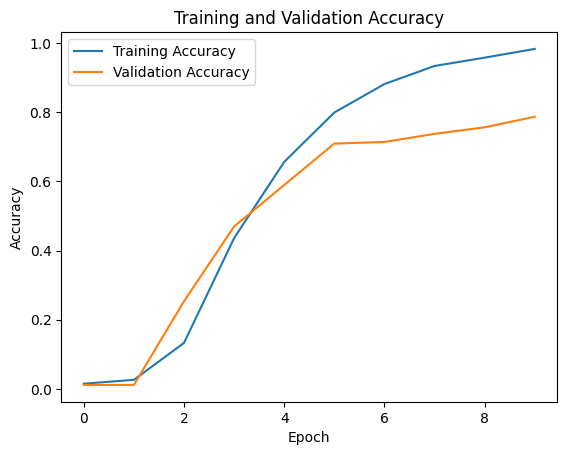

In [25]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [14]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


17/17 [==============================] - 3s 171ms/step - loss: 1.7504 - accuracy: 0.7711
Test Loss: 1.750393033027649
Test Accuracy: 0.7711069583892822
